# Task-2: K-Means Clustering

# Name: Sushrut Hundikar

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Finding the optimum number of clusters

In [3]:
sse = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

sse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.930963049671746,
 34.5100733116213,
 30.217021122152705,
 28.252703463203467,
 26.426295389208317]

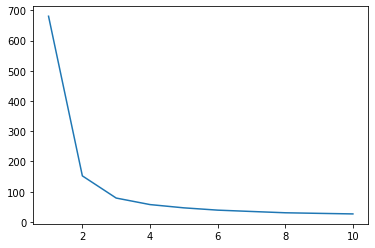

In [4]:
plt.plot(range(1,11),sse)

#### Pivot at k=3 implies Optimum number of clusters = 3

## Model

In [5]:
clusters = 3

model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_pred = model.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
df['cluster'] = y_pred
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


## Classification

In [6]:
x1 = df[df.cluster==0]
x2 = df[df.cluster==1]
x3 = df[df.cluster==2]

## Plotting

Text(0.5, 1.0, 'Sepal Width (cm) v/s Sepal Length (cm)')

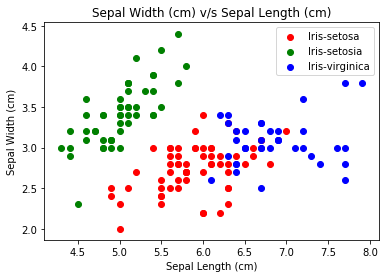

In [8]:
plt.scatter(x1['SepalLengthCm'],x1['SepalWidthCm'],color='Red',label='Iris-setosa')
plt.scatter(x2['SepalLengthCm'],x2['SepalWidthCm'],color='Green',label='Iris-setos1a')
plt.scatter(x3['SepalLengthCm'],x3['SepalWidthCm'],color='Blue',label='Iris-virginica')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(['Iris-setosa','Iris-setosia','Iris-virginica'])
plt.title('Sepal Width (cm) v/s Sepal Length (cm)')